<a href="https://colab.research.google.com/github/saheli56/ml-handbook/blob/main/Decision%20Trees%20for%20Classification%20in%20Machine%20Learning%20-%20Practical%20-%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Golf.csv')

In [ ]:
data

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [ ]:
data.columns

Index(['Day', 'Outlook', 'Temp.', 'Humidity', 'Wind', 'Decision'], dtype='object')

In [ ]:
data.columns = ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']

In [ ]:
data.head()

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [ ]:
data['Outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [ ]:
out = {'Sunny':1, 'Overcast':2, 'Rain':3}
data['Outlook'] = data['Outlook'].map(lambda x: out.get(x, x)) # Use .get() to handle existing numerical values
temp = {'Hot': 0, 'Mild': 1, 'Cool': 2}
data['Temp.'] = data['Temp.'].map(lambda x: temp.get(x, x)) # Use .get() to handle existing numerical values
data.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,1,0,1,1,1
1,1,0,1,1,1
2,2,0,1,1,1
3,3,1,1,1,1
4,3,2,1,1,1


In [ ]:
data['Temp.'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [ ]:
data['Temp.'].map

<bound method Series.map of 0      Hot
1      Hot
2      Hot
3     Mild
4     Cool
5     Cool
6     Cool
7     Mild
8     Cool
9     Mild
10    Mild
11    Mild
12     Hot
13    Mild
Name: Temp., dtype: object>

In [ ]:
data.head()

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,1,Hot,High,Weak,No
1,2,1,Hot,High,Strong,No
2,3,2,Hot,High,Weak,Yes
3,4,3,Mild,High,Weak,Yes
4,5,3,Cool,Normal,Weak,Yes


In [ ]:
data['Humidity'].unique()

array(['High', 'Normal'], dtype=object)

In [ ]:
data['Humidity']= data['Humidity'].map(lambda x: 0 if x == 'High' else 1)

In [ ]:
# Check if the column is already numerical before applying .lower()
if data['Wind'].dtype == 'object':
    data['Wind']= data['Wind'].map(lambda x: 0 if x.lower() == 'weak' else 1)
data.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,1,0,1,1,1
1,1,0,1,1,1
2,2,0,1,1,1
3,3,1,1,1,1
4,3,2,1,1,1


In [ ]:
data['Decision']= data['Decision'].map(lambda x: 0 if x == 'No' else 1)
data = data.drop('Day', axis=1)
data.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,1,Hot,1,1,1
1,1,Hot,1,1,1
2,2,Hot,1,1,1
3,3,Mild,1,1,1
4,3,Cool,1,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
# Ensure all columns are numerical before fitting the model
for col in ['Outlook', 'Temp.', 'Humidity', 'Wind']:
    if data[col].dtype == 'object':
        # This part should ideally not be reached after the previous fixes,
        # but added as a safeguard.
        print(f"Warning: Column '{col}' is still of object type.")
        # You might need to add more specific handling for each column here
        # if the previous conversions fail for some reason.
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna() # Drop rows with NaNs introduced by coercion

model.fit(data.iloc[:, 0:4], data.iloc[:, 4])

DecisionTreeClassifier()

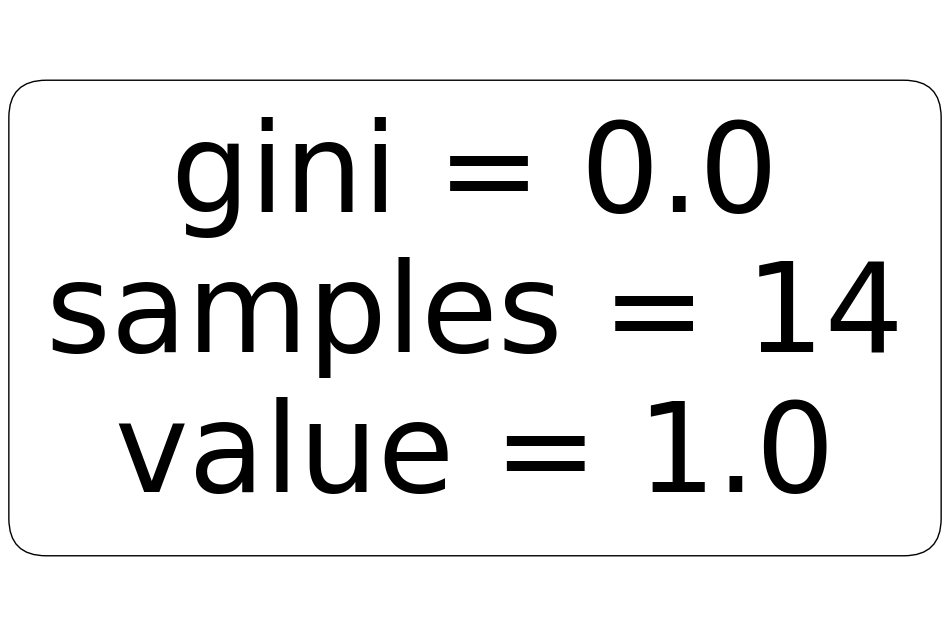

In [ ]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=data.columns[:-1].tolist(), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
out =['yes','no']
feature_names = data.columns[:-1].tolist()
dot = export_graphviz(decision_tree=model, out_file='glof.dot',feature_names=feature_names,class_names=out)

In [ ]:
! dot -T png glof.dot -o tree.png